In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/nwe data2.csv')



In [ ]:
null_values = df.isnull().sum()
print(null_values)

Date      0
Open     26
High     26
Low      26
Close    26
dtype: int64


In [ ]:
df.dropna()


,Date,Open,High,Low,Close
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805
3,07-01-2010,5281.799805,5302.549805,5244.75,5263.100098
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000
...,...,...,...,...,...
3404,10-10-2023,19565.599610,19717.800780,19565.44922,19689.849610
3405,11-10-2023,19767.000000,19839.199220,19756.94922,19811.349610
3406,12-10-2023,19822.699220,19843.300780,19772.65039,19794.000000
3407,13-10-2023,19654.550780,19805.400390,19635.30078,19751.050780


In [ ]:
df.head()


,Date,Open,High,Low,Close
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805
3,07-01-2010,5281.799805,5302.549805,5244.75,5263.100098
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000


In [ ]:
df.shape

(3409, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3409 non-null   object 
 1   Open    3383 non-null   float64
 2   High    3383 non-null   float64
 3   Low     3383 non-null   object 
 4   Close   3383 non-null   float64
dtypes: float64(3), object(2)
memory usage: 133.3+ KB


In [ ]:
# convert date field from string to Date format and make it index
df['Date'] = pd.to_datetime(df.Date)
df.head()


<ipython-input-10-90e16d94d117>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Date,Open,High,Low,Close
0,2010-04-01,5200.899902,5238.450195,5167.100098,5232.200195
1,2010-05-01,5277.149902,5288.350098,5242.399902,5277.899902
2,2010-06-01,5278.149902,5310.850098,5260.049805,5281.799805
3,2010-07-01,5281.799805,5302.549805,5244.75,5263.100098
4,2010-08-01,5264.250000,5276.750000,5234.700195,5244.750000


In [ ]:


df = pd.read_csv('/content/nwe data2.csv', parse_dates=['Date'], dayfirst=True)
df=df.dropna()

df.dropna(subset=['Date', 'Close'], inplace=True)


df['Year'] = df['Date'].dt.year
fig = go.Figure()

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    fig.add_trace(go.Scatter(
        x=year_data['Date'],  #
        y=year_data['Close'],
        mode='lines',
        name=f'Close Prices {year}',
    ))


fig.update_layout(
    title_text='Close Prices by Year (2010-2023)',
    xaxis_title='Date',
    yaxis_title='Close Price',
    plot_bgcolor='white',
)

iplot(fig)

In [ ]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Year'], dtype='object')


In [ ]:

# Assuming 'Date' is a column in your DataFrame
date_column = df['Date']
close_price = df['Close']
ma50 = close_price.rolling(window=50).mean()

# Find the index where moving average has non-NaN values
start_index = ma50.first_valid_index()

# Create traces for close price and moving average
trace_close = go.Scatter(x=date_column, y=close_price, mode='lines', name='Close Price')
trace_ma50 = go.Scatter(x=date_column[start_index:], y=ma50[start_index:], mode='lines', name='MA50')

# Create layout
layout = go.Layout(
    title='Close Price and 50-Day Moving Average',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)

# Create figure and add traces
fig = go.Figure(data=[trace_close, trace_ma50], layout=layout)

# Show the figure
fig.show()



In [ ]:

date_column = df['Date']
close_price = df['Close']
ma100 = close_price.rolling(window=100).mean()


start_index = ma100.first_valid_index()

trace_close = go.Scatter(x=date_column, y=close_price, mode='lines', name='Close Price', line=dict(color='blue'))
trace_ma100 = go.Scatter(x=date_column[start_index:], y=ma100[start_index:], mode='lines', name='MA100', line=dict(color='brown'))

layout = go.Layout(
    title='Close Price and 100-Day Moving Average',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)

fig = go.Figure(data=[trace_close, trace_ma100], layout=layout)

fig.show()


In [ ]:

date_column = df['Date']
close_price = df['Close']


ma50 = close_price.rolling(window=50).mean()
ma100 = close_price.rolling(window=100).mean()


start_index_50 = ma50.first_valid_index()
start_index_100 = ma100.first_valid_index()


trace_close = go.Scatter(x=date_column, y=close_price, mode='lines', name='Close Price', line=dict(color='blue'))
trace_ma50 = go.Scatter(x=date_column[start_index_50:], y=ma50[start_index_50:], mode='lines', name='MA50', line=dict(color='orange'))
trace_ma100 = go.Scatter(x=date_column[start_index_100:], y=ma100[start_index_100:], mode='lines', name='MA100', line=dict(color='brown'))

layout = go.Layout(
    title='Close Price and Moving Averages (MA50 and MA100)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)


fig = go.Figure(data=[trace_close, trace_ma50, trace_ma100], layout=layout)

fig.show()


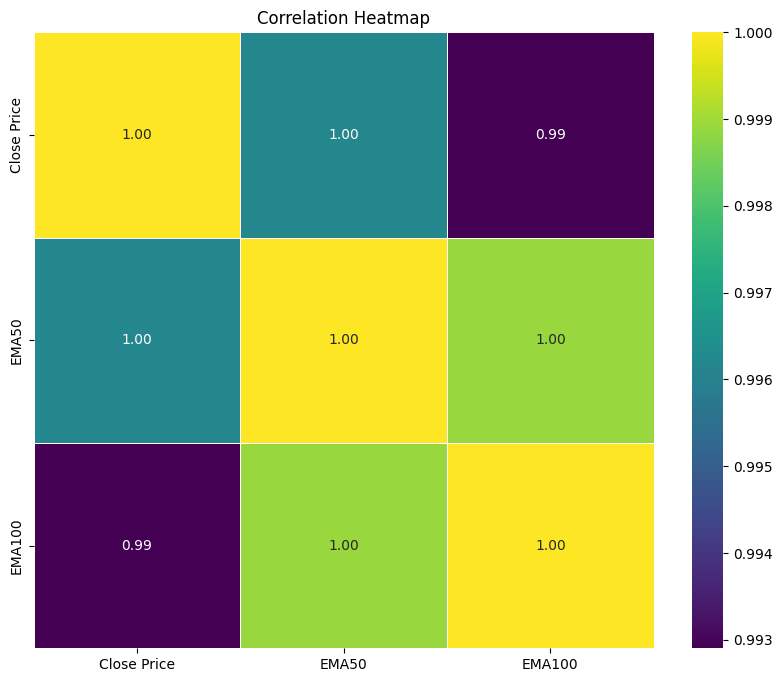

In [ ]:

 import matplotlib.pyplot as plt
 close_price = df['Close']


# Calculate exponential moving averages (EMA)
ema50 = close_price.ewm(span=50, adjust=False).mean()
ema100 = close_price.ewm(span=100, adjust=False).mean()

# Create a DataFrame with the indicators
data = pd.DataFrame({
    'Close Price': close_price,
    'EMA50': ema50,
    'EMA100': ema100
})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Year'], dtype='object')

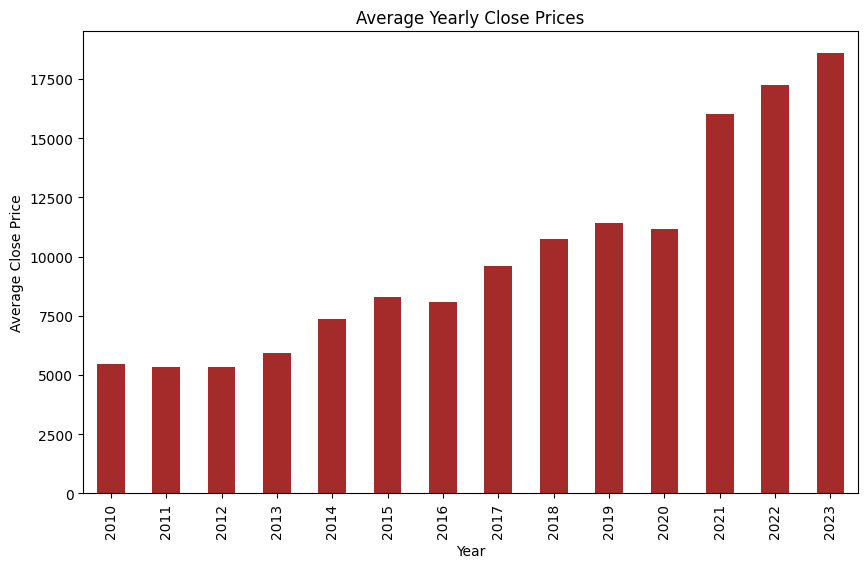

In [ ]:
 import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


# Group data by year and calculate the mean closing price for each year
yearly_close_data = df.groupby('Year')['Close'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
yearly_close_data.plot(kind='bar', title='Average Yearly Close Prices', color='brown')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

In [ ]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Year'], dtype='object')

In [ ]:
cols=['Date', 'Open', 'High', 'Low', 'Close', 'Year']

<ipython-input-21-d728b1cd902a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



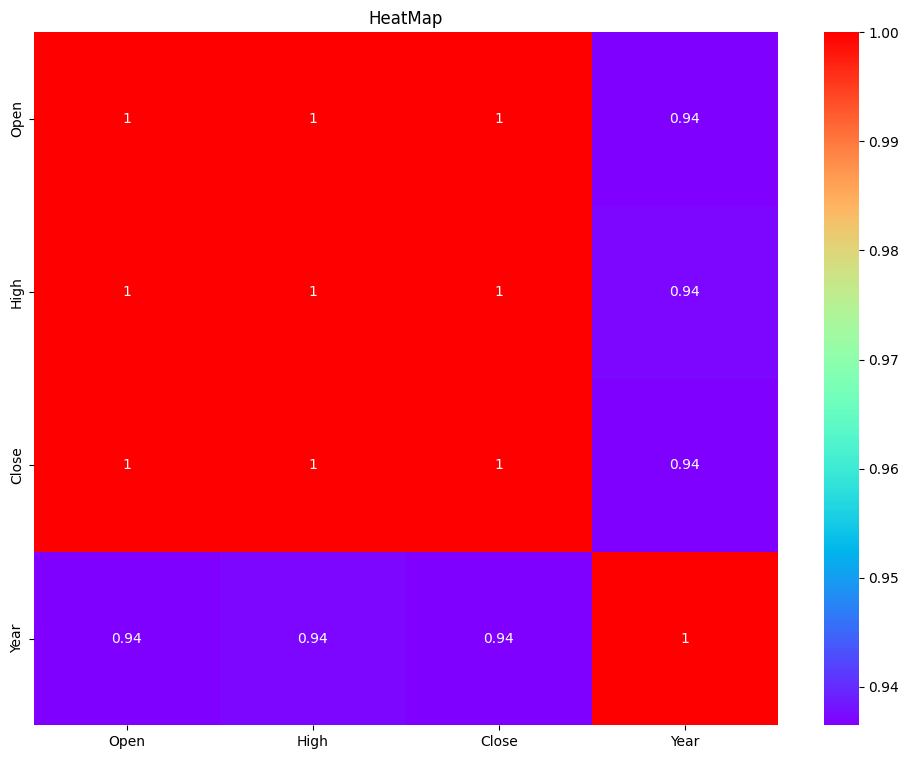

In [ ]:
Corr = df[cols].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np


In [ ]:
import math
# Create a new dataframe with only the 'Close' column
df= df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = df.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2707

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04396686],
       [0.04688731],
       [0.04713654],
       ...,
       [0.97454334],
       [0.97179866],
       [0.97056523]])

In [ ]:
# Create the training data set
# Create the scaled training data set
# Split the data into x_train and y_train data sets
train_data=scaled_data[0:training_data_len ,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Select a window of 60 previous rows and all columns
    y_train.append(train_data[i, 0])  # Assuming you want to predict the first column (e.g., "Price")

# The loop will create sequences of 60 rows as x_train and their corresponding target values as y_train.



    if i <= 60:
        print(x_train)
        print(y_train)

print()

[array([[0.04396686],
       [0.04688731],
       [0.04713654],
       [0.04594153],
       [0.04476886],
       [0.04506601],
       [0.04257371],
       [0.04407869],
       [0.04573702],
       [0.04524497],
       [0.04669242],
       [0.04354826],
       [0.04329585],
       [0.03514471],
       [0.03142862],
       [0.02963288],
       [0.01974035],
       [0.0206446 ],
       [0.02159039],
       [0.02271834],
       [0.01827052],
       [0.02477289],
       [0.01924508],
       [0.01114826],
       [0.01381631],
       [0.01587726],
       [0.01361183],
       [0.01806283],
       [0.0164716 ],
       [0.01990969],
       [0.02363217],
       [0.02195466],
       [0.01921631],
       [0.01995122],
       [0.02082352],
       [0.02009183],
       [0.02016531],
       [0.02416258],
       [0.03021442],
       [0.0347581 ],
       [0.03425643],
       [0.03479645],
       [0.03705229],
       [0.03561442],
       [0.03655703],
       [0.037653  ],
       [0.03788306],
       [0.03

In [ ]:
 #Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Define your LSTM model with the correct input shape
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) # Adjust input shape
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2647/2647 [==============================] - 190s 70ms/step - loss: 4.3355e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
 x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

22/22 [==============================] - 1s 32ms/step


927.8684948352706

In [ ]:
import plotly.express as px

train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

fig = px.line()

# Plotting Train Data
fig.add_scatter(x=train.index, y=train['Close'], mode='lines', name='close price', line=dict(color='blue'))

# Plotting Validation Data and Predictions
fig.add_scatter(x=valid.index, y=valid['Close'], mode='lines', name='training', line=dict(color='red'))
fig.add_scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions', line=dict(color='orange'))

fig.update_layout(
    title='LSTM Model',
    xaxis_title='timestamp',
    yaxis_title='Close Price nifty 50',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h')
)

fig.show()


<ipython-input-33-e30554702681>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

fig = px.line(valid, x=valid.index, y=['Close', 'Predictions'],
              labels={'index': '', 'value': 'Close Price nifty 50'},
              title='LSTM Model',
              color_discrete_map={'Close': 'red', 'Predictions': 'orange'})

fig.update_layout(
    xaxis_title='timestamp',
    yaxis_title='Close Price nifty 50',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

fig.show()


<ipython-input-34-f4492e30776d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
maindf=pd.read_csv('/content/nwe data2.csv')

In [ ]:
maindf=maindf.dropna()

In [ ]:
print("Null values:", maindf.isnull().values.sum())
print("NA values:", maindf.isna().values.any())

Null values: 0
NA values: False


In [ ]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3383, 2)


In [ ]:
closedf['Date'] = pd.to_datetime(closedf['Date'], format='%d-%m-%Y')
closedf = closedf[closedf['Date'] > '01-01-2021']
closedf = closedf.sort_values(by='Date')
close_stock = closedf.copy()
print("Total data for prediction: ", closedf.shape[0])


Total data for prediction:  690


<ipython-input-41-7d4f084717c7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(690, 1)


In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (414, 1)
test_data:  (276, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (398, 15)
y_train:  (398,)
X_test:  (260, 15)
y_test (260,)


In [ ]:
 #reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (398, 15, 1)
X_test:  (260, 15, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
13/13 [==============================] - 12s 306ms/step - loss: 0.0721 - val_loss: 0.0062
Epoch 2/200
13/13 [==============================] - 0s 27ms/step - loss: 0.0147 - val_loss: 0.0475
Epoch 3/200
13/13 [==============================] - 0s 28ms/step - loss: 0.0099 - val_loss: 0.0042
Epoch 4/200
13/13 [==============================] - 0s 29ms/step - loss: 0.0065 - val_loss: 0.0134
Epoch 5/200
13/13 [==============================] - 0s 30ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 6/200
13/13 [==============================] - 0s 28ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 7/200
13/13 [==============================] - 0s 27ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 8/200
13/13 [==============================] - 0s 29ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 9/200
13/13 [==============================] - 0s 28ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 10/200
13/13 [==============================] - 0s 27ms/step - loss: 0.0046 - val_loss: 0.00

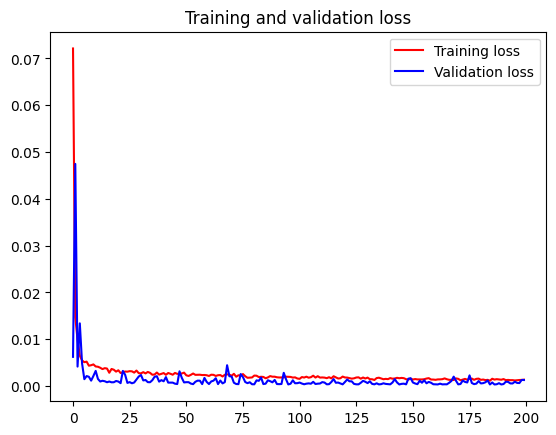

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 11ms/step


((398, 1), (260, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='GRU Model',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (690, 1)
Test predicted data:  (690, 1)
